<a href="https://colab.research.google.com/github/fboasorte/TopicosIC/blob/master/Etapa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# - Pandas
import pandas as pd
# - numpy
import numpy as np
# - seaborn
import seaborn as sb
# - scikitplot
# import scikitplot as skplt
# - sklearn
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
# - tensorflow
import tensorflow as tf
# - Matplotlib
import matplotlib.pyplot as plt

import warnings

sb.set_style("dark")
warnings.filterwarnings('ignore')

In [11]:
from google.colab import files
uploaded = files.upload()



Saving survey_results_public.csv to survey_results_public (1).csv


In [59]:
import io
df = pd.read_csv(io.BytesIO(uploaded['survey_results_public.csv']))
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [60]:
df['MainBranch'].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

In [61]:
data = df.query('MainBranch == "I am a developer by profession"')

In [62]:
data['JobSat'].value_counts()

Very satisfied                        13284
Slightly satisfied                    12571
Slightly dissatisfied                  6384
Neither satisfied nor dissatisfied     5179
Very dissatisfied                      3346
Name: JobSat, dtype: int64

In [63]:
data.query('Country == "Brazil"')['JobSat'].value_counts()

Slightly satisfied                    359
Very satisfied                        337
Slightly dissatisfied                 218
Neither satisfied nor dissatisfied    164
Very dissatisfied                     129
Name: JobSat, dtype: int64

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          21684
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       10815
Some college/university study without earning a degree                                 4888
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1928
Associate degree (A.A., A.S., etc.)                                                    1379
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1004
Professional degree (JD, MD, etc.)                                                      577
I never completed any formal education                                                  287
Primary/elementary school                                                               219
Name: EdLevel, dtype: int64

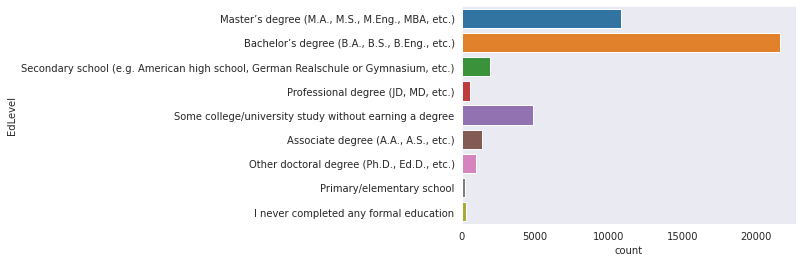

In [64]:
sb.countplot(y = 'EdLevel', data = data)
data['EdLevel'].value_counts()

In [65]:
columns = ['JobSat','Country','YearsCode', 'Age1stCode', 'EdLevel', 'DevType', 'JobSeek', 'MiscTechWorkedWith', 'LanguageWorkedWith', 'OpSys', 'Age', 'ConvertedComp',
           'Hobbyist', 'MainBranch', 'YearsCodePro', 'WebframeWorkedWith', 'UndergradMajor', 'PurchaseWhat', 'PlatformWorkedWith', 'OrgSize',
           'NEWStuck', 'NEWEdImpt', 'JobFactors', 'Employment','DatabaseWorkedWith']

data = data[columns]
data.head(10)

,JobSat,Country,YearsCode,Age1stCode,EdLevel,DevType,JobSeek,MiscTechWorkedWith,LanguageWorkedWith,OpSys,Age,ConvertedComp,Hobbyist,MainBranch,YearsCodePro,WebframeWorkedWith,UndergradMajor,PurchaseWhat,PlatformWorkedWith,OrgSize,NEWStuck,NEWEdImpt,JobFactors,Employment,DatabaseWorkedWith
0,Slightly satisfied,Germany,36,13,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Developer, desktop or enterprise applications;...",I am not interested in new job opportunities,.NET;.NET Core,C#;HTML/CSS;JavaScript,Windows,NaN,NaN,Yes,I am a developer by profession,27,ASP.NET;ASP.NET Core,"Computer science, computer engineering, or sof...",NaN,Windows,2 to 9 employees,Visit Stack Overflow;Go for a walk or other ph...,Fairly important,"Languages, frameworks, and other technologies ...","Independent contractor, freelancer, or self-em...",Elasticsearch;Microsoft SQL Server;Oracle
1,Very dissatisfied,United Kingdom,7,19,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack;Developer, mobile",I am not interested in new job opportunities,React Native,JavaScript;Swift,MacOS,NaN,NaN,No,I am a developer by profession,4,NaN,"Computer science, computer engineering, or sof...",I have little or no influence,iOS,"1,000 to 4,999 employees",Visit Stack Overflow;Go for a walk or other ph...,Fairly important,NaN,Employed full-time,NaN
3,Slightly dissatisfied,Albania,7,18,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,"I’m not actively looking, but I am open to new...",NaN,NaN,Linux-based,25.0,NaN,Yes,I am a developer by profession,4,NaN,"Computer science, computer engineering, or sof...",I have a great deal of influence,NaN,20 to 99 employees,NaN,Not at all important/not necessary,Flex time or a flexible schedule;Office enviro...,NaN,NaN
5,Slightly satisfied,Germany,6,14,"Secondary school (e.g. American high school, G...","Designer;Developer, front-end;Developer, mobile",I am not interested in new job opportunities,NaN,HTML/CSS;Java;JavaScript,Windows,NaN,NaN,No,I am a developer by profession,4,NaN,NaN,I have some influence,Android;Docker;WordPress,NaN,Play games;Visit Stack Overflow;Watch help / t...,Fairly important,Diversity of the company or organization;Langu...,Employed full-time,NaN
6,Very satisfied,India,6,18,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end;Developer, front-end;Devel...","I’m not actively looking, but I am open to new...",NaN,C#;HTML/CSS;PHP,Windows,NaN,NaN,Yes,I am a developer by profession,4,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,20 to 99 employees,NaN,Very important,NaN,Employed full-time,NaN
7,Slightly dissatisfied,United States,17,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end;Developer, desktop or ente...","I’m not actively looking, but I am open to new...",Ansible,Python;SQL,Linux-based,36.0,116000.0,Yes,I am a developer by profession,13,Flask,"Computer science, computer engineering, or sof...",I have some influence,Docker,20 to 99 employees,Play games;Call a coworker or friend;Visit Sta...,Not at all important/not necessary,Remote work options;Opportunities for professi...,Employed full-time,MariaDB;MySQL;Redis
8,Very dissatisfied,Tunisia,6,20,"Professional degree (JD, MD, etc.)","Developer, full-stack","I’m not actively looking, but I am open to new...",NaN,HTML/CSS;JavaScript;PHP,Windows,30.0,NaN,No,I am a developer by profession,4,jQuery,"Computer science, computer engineering, or sof...",NaN,WordPress,"Just me - I am a freelancer, sole proprietor, ...",Meditate,Very important,Diversity of the company or organization;Remot...,"Independent contractor, freelancer, or self-em...",NaN
9,Very satisfied,United Kingdom,8,14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Database administrator;Developer, full-stack;D...","I’m not actively looking, but I am open to new...",Pandas,HTML/CSS;Java;JavaScript;Python;SQL,Windows,22.0,32315.0,Yes,I am a developer by profession,4,Flask;jQuery,Mathematics or statistics,I have a great deal of in

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47193 entries, 0 to 64159
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JobSat              40764 non-null  object 
 1   Country             47008 non-null  object 
 2   YearsCode           42855 non-null  object 
 3   Age1stCode          42944 non-null  object 
 4   EdLevel             42781 non-null  object 
 5   DevType             41733 non-null  object 
 6   JobSeek             40376 non-null  object 
 7   MiscTechWorkedWith  30825 non-null  object 
 8   LanguageWorkedWith  42397 non-null  object 
 9   OpSys               41521 non-null  object 
 10  Age                 34348 non-null  float64
 11  ConvertedComp       31581 non-null  float64
 12  Hobbyist            47163 non-null  object 
 13  MainBranch          47193 non-null  object 
 14  YearsCodePro        41087 non-null  object 
 15  WebframeWorkedWith  33762 non-null  object 
 16  Unde

In [66]:
data = data.dropna()
data.head()

,JobSat,Country,YearsCode,Age1stCode,EdLevel,DevType,JobSeek,MiscTechWorkedWith,LanguageWorkedWith,OpSys,Age,ConvertedComp,Hobbyist,MainBranch,YearsCodePro,WebframeWorkedWith,UndergradMajor,PurchaseWhat,PlatformWorkedWith,OrgSize,NEWStuck,NEWEdImpt,JobFactors,Employment,DatabaseWorkedWith
7,Slightly dissatisfied,United States,17,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end;Developer, desktop or ente...","I’m not actively looking, but I am open to new...",Ansible,Python;SQL,Linux-based,36.0,116000.0,Yes,I am a developer by profession,13,Flask,"Computer science, computer engineering, or sof...",I have some influence,Docker,20 to 99 employees,Play games;Call a coworker or friend;Visit Sta...,Not at all important/not necessary,Remote work options;Opportunities for professi...,Employed full-time,MariaDB;MySQL;Redis
9,Very satisfied,United Kingdom,8,14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Database administrator;Developer, full-stack;D...","I’m not actively looking, but I am open to new...",Pandas,HTML/CSS;Java;JavaScript;Python;SQL,Windows,22.0,32315.0,Yes,I am a developer by profession,4,Flask;jQuery,Mathematics or statistics,I have a great deal of influence,Android;Linux;Raspberry Pi;Windows,2 to 9 employees,Visit Stack Overflow,Fairly important,Flex time or a flexible schedule;How widely us...,Employed full-time,Microsoft SQL Server
10,Slightly dissatisfied,United Kingdom,10,13,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end;Developer, desktop or ente...",I am actively looking for a job,Node.js,C#;JavaScript;Swift,Windows,23.0,40070.0,Yes,I am a developer by profession,2,Angular;Angular.js;Django;React.js,"Computer science, computer engineering, or sof...",I have little or no influence,AWS;Heroku;iOS,"10,000 or more employees",Play games;Call a coworker or friend;Visit Sta...,Very important,"Flex time or a flexible schedule;Languages, fr...",Employed full-time,Firebase;MongoDB;PostgreSQL;SQLite
13,Slightly satisfied,United States,5,13,"Associate degree (A.A., A.S., etc.)","Developer, desktop or enterprise applications;...","I’m not actively looking, but I am open to new...",Node.js,HTML/CSS;JavaScript;SQL;TypeScript,Windows,27.0,66000.0,Yes,I am a developer by profession,1,Angular;Vue.js,"Computer science, computer engineering, or sof...",I have little or no influence,Google Cloud Platform;Windows,100 to 499 employees,Call a coworker or friend;Visit Stack Overflow...,Somewhat important,Industry that I’d be working in;Flex time or a...,Employed full-time,Firebase;Microsoft SQL Server
18,Slightly dissatisfied,United States,9,15,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","I’m not actively looking, but I am open to new...",.NET;.NET Core;Node.js,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,Windows,24.0,83400.0,No,I am a developer by profession,3,Angular;Angular.js;ASP.NET Core,"Computer science, computer engineering, or sof...",I have little or no influence,Windows,"10,000 or more employees",Call a coworker or friend;Visit Stack Overflow...,Fairly important,Flex time or a flexible schedule;Office enviro...,Employed full-time,MariaDB;Microsoft SQL Server


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13193 entries, 7 to 63955
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JobSat              13193 non-null  object 
 1   Country             13193 non-null  object 
 2   YearsCode           13193 non-null  object 
 3   Age1stCode          13193 non-null  object 
 4   EdLevel             13193 non-null  object 
 5   DevType             13193 non-null  object 
 6   JobSeek             13193 non-null  object 
 7   MiscTechWorkedWith  13193 non-null  object 
 8   LanguageWorkedWith  13193 non-null  object 
 9   OpSys               13193 non-null  object 
 10  Age                 13193 non-null  float64
 11  ConvertedComp       13193 non-null  float64
 12  Hobbyist            13193 non-null  object 
 13  MainBranch          13193 non-null  object 
 14  YearsCodePro        13193 non-null  object 
 15  WebframeWorkedWith  13193 non-null  object 
 16  Unde

In [73]:
data = data.reset_index(drop=True)
data

,JobSat,Country,YearsCode,Age1stCode,EdLevel,DevType,JobSeek,MiscTechWorkedWith,LanguageWorkedWith,OpSys,Age,ConvertedComp,Hobbyist,MainBranch,YearsCodePro,WebframeWorkedWith,UndergradMajor,PurchaseWhat,PlatformWorkedWith,OrgSize,NEWStuck,NEWEdImpt,JobFactors,Employment,DatabaseWorkedWith
0,Slightly dissatisfied,United States,17,12,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end;Developer, desktop or ente...","I’m not actively looking, but I am open to new...",Ansible,Python;SQL,Linux-based,36.0,116000.0,Yes,I am a developer by profession,13,Flask,"Computer science, computer engineering, or sof...",I have some influence,Docker,20 to 99 employees,Play games;Call a coworker or friend;Visit Sta...,Not at all important/not necessary,Remote work options;Opportunities for professi...,Employed full-time,MariaDB;MySQL;Redis
1,Very satisfied,United Kingdom,8,14,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Database administrator;Developer, full-stack;D...","I’m not actively looking, but I am open to new...",Pandas,HTML/CSS;Java;JavaScript;Python;SQL,Windows,22.0,32315.0,Yes,I am a developer by profession,4,Flask;jQuery,Mathematics or statistics,I have a great deal of influence,Android;Linux;Raspberry Pi;Windows,2 to 9 employees,Visit Stack Overflow,Fairly important,Flex time or a flexible schedule;How widely us...,Employed full-time,Microsoft SQL Server
2,Slightly dissatisfied,United Kingdom,10,13,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end;Developer, desktop or ente...",I am actively looking for a job,Node.js,C#;JavaScript;Swift,Windows,23.0,40070.0,Yes,I am a developer by profession,2,Angular;Angular.js;Django;React.js,"Computer science, computer engineering, or sof...",I have little or no influence,AWS;Heroku;iOS,"10,000 or more employees",Play games;Call a coworker or friend;Visit Sta...,Very important,"Flex time or a flexible schedule;Languages, fr...",Employed full-time,Firebase;MongoDB;PostgreSQL;SQLite
3,Slightly satisfied,United States,5,13,"Associate degree (A.A., A.S., etc.)","Developer, desktop or enterprise applications;...","I’m not actively looking, but I am open to new...",Node.js,HTML/CSS;JavaScript;SQL;TypeScript,Windows,27.0,66000.0,Yes,I am a developer by profession,1,Angular;Vue.js,"Computer science, computer engineering, or sof...",I have little or no influence,Google Cloud Platform;Windows,100 to 499 employees,Call a coworker or friend;Visit Stack Overflow...,Somewhat important,Industry that I’d be working in;Flex time or a...,Employed full-time,Firebase;Microsoft SQL Server
4,Slightly dissatisfied,United States,9,15,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","I’m not actively looking, but I am open to new...",.NET;.NET Core;Node.js,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,Windows,24.0,83400.0,No,I am a developer by profession,3,Angular;Angular.js;ASP.NET Core,"Computer science, computer engineering, or sof...",I have little or no influence,Windows,"10,000 or more employees",Call a coworker or friend;Visit Stack Overflow...,Fairly important,Flex time or a flexible schedule;Office enviro...,Employed full-time,MariaDB;Microsoft SQL Server
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13188,Slightly dissatisfied,Canada,8,19,"Associate degree (A.A., A.S., etc.)",DevOps specialist,"I’m not actively looking, but I am open to new...",Ansible;Node.js;Teraform,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;SQL,Linux-based,30.0,1000000.0,Yes,I am a developer by profession,4,Express,"Computer science, computer engineering, or sof...",I have some influence,AWS;Docker;Google Cloud Platform;Kubernetes;Li...,"1,000 to 4,999 employees",Visit Stack Overflow;Go for a walk or other ph...,Critically important,Industry that I’d be working in;Specific depar...,Employed full-time,Elasticsearch;MongoDB;MySQL;PostgreSQL;Redis
13189,Slightly satisfied,Singapore,3,21,"Bachelor’s degree (B.A., B.S., B

In [74]:
def onehot_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis = 1)
        df = df.drop(column, axis = 1)
    return df

def onehot_encode_semicolon(df, columns):
    df = df.copy()
    skills = [[] for _ in range(len(df.index))]
    new_columns = []
    for column in columns:
        sp = df[column].str.split(';')
        for row, linha in zip(sp, np.arange(len(sp))):
            for item in row:
                if item not in new_columns:
                    new_columns.append(item)
            skills[linha].append(item)
        df = df.drop(column, axis = 1)
                    
    new_values = [
    [0 for _ in range(len(new_columns))] for _ in range(len(df.index)) 
    ]
    
    temp = pd.DataFrame(data = new_values , columns = new_columns, index = df.index)  
    
    for ans, i  in zip(skills, np.arange(len(skills))):
        temp.loc[i, ans] = 1

    df = pd.concat([df, temp], axis = 1)

    return df
    
    
def label_encoder(df, columns):
    df = df.copy()
    
    labels_enc = [LabelEncoder() for _ in range(len(columns))]
    for column, le in zip(columns, labels_enc):
        le.fit(df[column])
        col = pd.DataFrame(data=le.transform(df[column]), columns=[column])

        df = df.drop(column, axis = 1)
        df = pd.concat([df, col], axis = 1)
    return df

In [75]:
semicolon = []
others = []
for column in data:
    if data.dtypes[column] == 'object':  
        c = False
        if True in data[column].str.contains(';').values:
            semicolon.append(column)
        else:
            others.append(column) 

In [76]:
data = label_encoder(data, others)
data

,DevType,MiscTechWorkedWith,LanguageWorkedWith,Age,ConvertedComp,WebframeWorkedWith,PlatformWorkedWith,NEWStuck,JobFactors,DatabaseWorkedWith,JobSat,Country,YearsCode,Age1stCode,EdLevel,JobSeek,OpSys,Hobbyist,MainBranch,YearsCodePro,UndergradMajor,PurchaseWhat,OrgSize,NEWEdImpt,Employment
0,"Developer, back-end;Developer, desktop or ente...",Ansible,Python;SQL,36.0,116000.0,Flask,Docker,Play games;Call a coworker or friend;Visit Sta...,Remote work options;Opportunities for professi...,MariaDB;MySQL;Redis,1,136,8,2,1,2,1,1,0,4,6,2,5,2,0
1,"Database administrator;Developer, full-stack;D...",Pandas,HTML/CSS;Java;JavaScript;Python;SQL,22.0,32315.0,Flask;jQuery,Android;Linux;Raspberry Pi;Windows,Visit Stack Overflow,Flex time or a flexible schedule;How widely us...,Microsoft SQL Server,4,134,47,4,2,2,3,1,0,33,10,0,4,1,0
2,"Developer, back-end;Developer, desktop or ente...",Node.js,C#;JavaScript;Swift,23.0,40070.0,Angular;Angular.js;Django;React.js,AWS;Heroku;iOS,Play games;Call a coworker or friend;Visit Sta...,"Flex time or a flexible schedule;Languages, fr...",Firebase;MongoDB;PostgreSQL;SQLite,1,134,1,3,1,0,3,1,0,11,6,1,2,4,0
3,"Developer, desktop or enterprise applications;...",Node.js,HTML/CSS;JavaScript;SQL;TypeScript,27.0,66000.0,Angular;Vue.js,Google Cloud Platform;Windows,Call a coworker or friend;Visit Stack Overflow...,Industry that I’d be working in;Flex time or a...,Firebase;Microsoft SQL Server,2,136,44,3,0,2,3,1,0,0,6,1,3,3,0
4,"Developer, full-stack",.NET;.NET Core;Node.js,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,24.0,83400.0,Angular;Angular.js;ASP.NET Core,Windows,Call a coworker or friend;Visit Stack Overflow...,Flex time or a flexible schedule;Office enviro...,MariaDB;Microsoft SQL Server,1,136,48,5,1,2,3,0,0,22,6,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13188,DevOps specialist,Ansible;Node.js;Teraform,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;SQL,30.0,1000000.0,Express,AWS;Docker;Google Cloud Platform;Kubernetes;Li...,Visit Stack Overflow;Go for a walk or other ph...,Industry that I’d be working in;Specific depar...,Elasticsearch;MongoDB;MySQL;PostgreSQL;Redis,1,22,47,9,0,2,1,1,0,33,6,2,0,0,0
13189,"Developer, full-stack",.NET,C#;HTML/CSS;JavaScript;SQL,30.0,38724.0,ASP.NET;jQuery,Windows,Call a coworker or friend;Visit Stack Overflow...,"Languages, frameworks, and other technologies ...",Microsoft SQL Server,2,112,22,11,1,2,3,1,0,40,5,1,2,3,0
13190,"Database administrator;Developer, back-end;Dev...",.NET Core;Node.js,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,32.0,74500.0,Angular;ASP.NET Core;Django;jQuery,Linux;MacOS,Play games;Call a coworker or friend;Visit Sta...,"Flex time or a flexible schedule;Languages, fr...",MariaDB;Microsoft SQL Server;MySQL,2,136,10,2,5,2,1,1,0,43,6,2,1,2,0
13191,"Developer, back-end;DevOps specialist",Pandas,Assembly;C;C++;HTML/CSS;Java;JavaScript;PHP;Py...,33.0,59454.0,Django;Flask;jQuery;Ruby on Rails,Docker;Linux,Call a coworker or friend;Visit Stack Overflow...,Flex time or a flexible schedule;Office enviro...,DynamoDB;Elasticsearch;MongoDB;MySQL;Oracle;Po...,4,41,12,3,4,1,2,0,0,3,6,2,3,1,0


In [77]:
data = onehot_encode_semicolon(data, semicolon)
data

,Age,ConvertedComp,JobSat,Country,YearsCode,Age1stCode,EdLevel,JobSeek,OpSys,Hobbyist,MainBranch,YearsCodePro,UndergradMajor,PurchaseWhat,OrgSize,NEWEdImpt,Employment,"Developer, back-end","Developer, desktop or enterprise applications","Developer, game or graphics",Database administrator,"Developer, full-stack","Developer, mobile","Developer, embedded applications or devices","Developer, front-end",Engineering manager,DevOps specialist,Data scientist or machine learning specialist,"Developer, QA or test","Engineer, data",Scientist,Data or business analyst,System administrator,Designer,Educator,"Engineer, site reliability",Product manager,Academic researcher,Senior executive/VP,Marketing or sales professional,...,MacOS,Slack Apps and Integrations,Arduino,Microsoft Azure,WordPress,IBM Cloud or Watson,Play games,Call a coworker or friend,Visit Stack Overflow,Go for a walk or other physical activity,Watch help / tutorial videos,Do other work and come back later,Panic,Meditate,Visit another developer community (please name):,Remote work options,Opportunities for professional development,Family friendliness,Flex time or a flexible schedule,How widely used or impactful my work output would be,"Languages, frameworks, and other technologies I’d be working with",Industry that I’d be working in,Office environment or company culture,Diversity of the company or organization,Specific department or team I’d be working on,Financial performance or funding status of the company or organization,MariaDB,MySQL,Redis,Microsoft SQL Server,Firebase,MongoDB,PostgreSQL,SQLite,Oracle,Elasticsearch,Cassandra,DynamoDB,Couchbase,IBM DB2
0,36.0,116000.0,1,136,8,2,1,2,1,1,0,4,6,2,5,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,22.0,32315.0,4,134,47,4,2,2,3,1,0,33,10,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,23.0,40070.0,1,134,1,3,1,0,3,1,0,11,6,1,2,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,27.0,66000.0,2,136,44,3,0,2,3,1,0,0,6,1,3,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24.0,83400.0,1,136,48,5,1,2,3,0,0,22,6,1,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13188,30.0,1000000.0,1,22,47,9,0,2,1,1,0,33,6,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
13189,30.0,38724.0,2,112,22,11,1,2,3,1,0,40,5,1,2,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
13190,32.0,74500.0,2,136,10,2,5,2,1,1,0,43,6,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
13191,33.0,59454.0,4,41,12,3,4,1,2,0,0,3,6,2,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


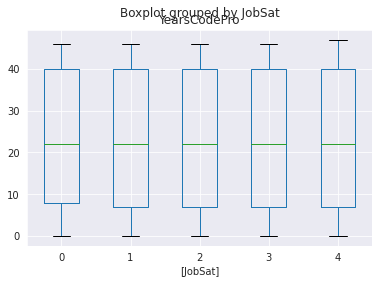

In [78]:
columns = ['JobSat','Country','YearsCode', 'Age1stCode', 'EdLevel', 'DevType', 'JobSeek', 'MiscTechWorkedWith', 'LanguageWorkedWith', 'OpSys', 'Age', 'ConvertedComp',
           'Hobbyist', 'MainBranch', 'YearsCodePro', 'WebframeWorkedWith', 'UndergradMajor', 'PurchaseWhat', 'PlatformWorkedWith', 'OrgSize',
           'NEWStuck', 'NEWEdImpt', 'JobFactors', 'Employment','DatabaseWorkedWith']


qe05 = pd.DataFrame(data, columns=['JobSat', 'YearsCodePro'])
qe05.boxplot(by='JobSat')

In [79]:
data['JobSat'].groupby(data['YearsCodePro']).describe()

,count,mean,std,min,25%,50%,75%,max
YearsCodePro,,,,,,,,
0,679.0,2.310751,1.373706,0.0,1.00,2.0,4.00,4.0
1,784.0,2.377551,1.341091,0.0,1.00,2.0,4.00,4.0
2,320.0,2.346875,1.339650,0.0,1.00,2.0,4.00,4.0
3,451.0,2.319290,1.371149,0.0,1.00,2.0,4.00,4.0
4,290.0,2.313793,1.364966,0.0,1.00,2.0,4.00,4.0
5,213.0,2.314554,1.359670,0.0,1.00,2.0,4.00,4.0
6,423.0,2.366430,1.412707,0.0,1.00,2.0,4.00,4.0
7,199.0,2.492462,1.373888,0.0,1.00,2.0,4.00,4.0
8,133.0,2.210526,1.392908,0.0,1.00,2.0,4.00,4.0


In [80]:
data['JobSat'].describe()
data['YearsCodePro'].describe()

count    13193.000000
mean        23.010915
std         16.502059
min          0.000000
25%          7.000000
50%         22.000000
75%         40.000000
max         47.000000
Name: YearsCodePro, dtype: float64

In [81]:
print('indice da primeira maior nota: ', data['YearsCodePro'].idxmax())
print('Maior nota: ', data['YearsCodePro'][ data['YearsCodePro'].idxmax()])

indice da primeira maior nota:  816
Maior nota:  47


In [82]:
ccomp = data[data['JobSat']==4]

print(ccomp)

        Age  ConvertedComp  JobSat  ...  DynamoDB  Couchbase  IBM DB2
1      22.0        32315.0       4  ...         0          0        0
6      35.0        97288.0       4  ...         0          0        0
7      32.0       130000.0       4  ...         0          0        0
8      22.0        36753.0       4  ...         0          0        0
9      53.0        74970.0       4  ...         0          0        0
...     ...            ...     ...  ...       ...        ...      ...
13177  23.0        18400.0       4  ...         0          0        0
13178  34.0       150000.0       4  ...         0          0        0
13187  31.0        84019.0       4  ...         0          0        0
13191  33.0        59454.0       4  ...         0          0        0
13192  22.0         9612.0       4  ...         0          0        0

[4245 rows x 150 columns]


In [83]:
ccomp['Age'].describe()

count    4245.000000
mean       31.679388
std         7.985269
min        17.000000
25%        26.000000
50%        30.000000
75%        36.000000
max        99.000000
Name: Age, dtype: float64

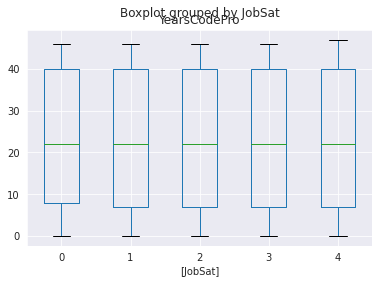

In [84]:
qe05 = pd.DataFrame(data, columns=['JobSat', 'YearsCodePro'])
qe05.boxplot(by='JobSat')